In [1]:
from utils import *

# Bloch Sphere Representation

In [2]:
x,y,z = -3/5,0,4/5

xp, yp, zp = 1/np.sqrt(2) * (x-z), y, 1/np.sqrt(2) * (-x-z)
xp, yp,zp

(-0.9899494936611664, 0, -0.14142135623730953)

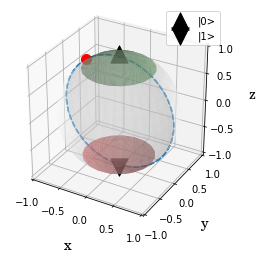

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_bloch_regions(ax)
ang = np.pi
r = np.sqrt(0.9)
z0 = r
z1 = np.sqrt(1 - r**2) * np.exp(1j * ang)
bloch_transformation(trange, np.array([z0, z1]), ham(Y), ax)

ax.legend()
plt.show()

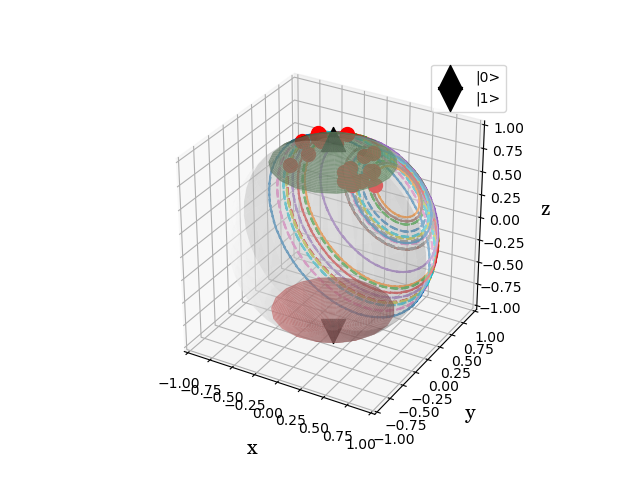

In [4]:
%matplotlib widget
trange = np.arange(0, 2*np.pi, 0.1)

# fig, ax = plt.subplots(1, 1,
#                        subplot_kw={'projection':'3d', 'box_aspect': (1,1,1)},
#                        figsize=(5,5))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',box_aspect=(1,1,1))

plot_bloch_regions(ax)

k = 20
for i in range(k+1):
    ang = randang()
    # ang = 2*np.pi * i/k
    r = np.sqrt(0.9)# + (1 - np.sqrt(0.9)) * i/k
    r = np.random.uniform(np.sqrt(0.9),1)
    z0 = r
    z1 = np.sqrt(1 - r**2) * np.exp(1j * ang)
    bloch_transformation(trange, np.array([z0, z1]), had_ham, ax)
    
# ang = np.pi
# r = np.sqrt(0.9)
# # ang = randang()
# # r = np.sqrt(0.9) + (1 - np.sqrt(0.9)) * np.random.uniform()
# z0 = r
# z1 = np.sqrt(1 - r**2) * np.exp(1j * ang)
# bloch_transformation(trange, np.array([z0, z1]), had_ham, ax)

ax.legend()
plt.show()

In [5]:
def add_color_wheel(whl_ax, phase):
    whl_ax._direction = 2*np.pi
    norm = mpl.colors.Normalize(0.0, 2*np.pi)

    quant_steps = 2056
    whl_ax.grid(False)
    cb = mpl.colorbar.ColorbarBase(whl_ax, cmap=mpl.cm.get_cmap('hsv',quant_steps), norm=norm, orientation='horizontal')

    size = 'xx-large'
    cb.outline.set_visible(False)
    whl_ax.set_axis_off()
    whl_ax.set_rlim([-1,1])
    whl_ax.annotate('0', (0,1), (0-0.1,1.1), size=size)
    whl_ax.annotate('π/2', (np.pi/2,1), (np.pi/2 +0.1,1.1), size=size)
    whl_ax.annotate('π', (np.pi,1), (np.pi +0.1,1.4), size=size)
    whl_ax.annotate('3π/2', (3*np.pi/2,1), (3*np.pi/2 -0.1,1.4), size=size)
    # whl_ax.scatter((phase,1))

In [6]:
%matplotlib inline

trange = np.arange(0, 2*np.pi, 0.1)
t = trange

# Making dataset
# ang = randang()
# r = np.random.uniform(np.sqrt(0.9), 1)
r = np.sqrt(0.9)
ang = np.pi
z0 = r
z1 = np.sqrt(1 - r**2) * np.exp(1j * ang)    
x_0 = np.array([z0, z1])
z_vec, o_vec = get_states(trange, x_0, had_ham)
xs, ys, zs, phases = state_to_bloch(z_vec, o_vec)
dataSet = np.array([xs, ys, zs, phases])
numDataPoints = len(t)

# Want to use cmap
cmap=mpl.cm.get_cmap('hsv',numDataPoints)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(121, projection='3d', box_aspect=(1,1,1))
whl_ax = fig.add_subplot(122, projection='polar')

def animate_func(num):
    ax.clear()
    
    # Plots regions on sphere
    plot_regions(ax)
    
    # Plots trajectory line
    ax.plot(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], color='blue')

    # Updating Point Location
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               color=cmap(num/numDataPoints), marker='o', s=100)
    
    # Add start point
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],     
               c='black', marker='o')
    
    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-1, 1])

    # Adding Figure Labels
    ax.set_title('Hamiltonian Evolution (Hadamard gate)\nTime = ' + str(np.round(t[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    
# Plotting the Animation
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                   frames=numDataPoints)

add_color_wheel(whl_ax, dataSet[3, 5])


HTML(line_ani.to_jshtml())

NameError: name 'plot_regions' is not defined

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb5118a6cb0> (for post_execute):


NameError: name 'plot_regions' is not defined

AttributeError: 'float' object has no attribute 'get_matrix'